# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [58]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [59]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [60]:
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

In [61]:
sensor.shape

(1751, 12)

In [62]:
df = sensor.dropna()

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [63]:
#Using isna() to select all rows with NaN under an entire DataFrame
nan_values =sensor[sensor.isna().any(axis=1)]
df = sensor.dropna()
df.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

How many rows and columns are in our data?

In [64]:
df.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [65]:
sensor['Time_serie']=pd.date_range(start= '1/1/2018 00:00:00',
                  end='1/1/2018 00:29:10',
                 periods=1751)
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  \
0            0.294894           -0.184493            0.377542   
1            0.219405            0.035846            0.114866   
2            0.010714            0.134701           -0.167808   
3           -0.008389            0.136788            0.094958   
4            0.199441            0.353996           -0.044299   

           Time_serie  
0 2018-01-01 00:00:00  
1 2018-01-01 00:00:01  
2 2018-01-01 00:00:02  
3 2018-01-01 00:00:03  
4 2018-01-01 00:00:04

Assign the time series index to the dataframe's index.

In [66]:
sensor['datetime'] = pd.to_datetime(sensor['Time_serie'])
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  \
0            0.294894           -0.184493            0.377542   
1            0.219405            0.035846            0.114866   
2            0.010714            0.134701           -0.167808   
3           -0.008389            0.136788            0.094958   
4            0.199441            0.353996           -0.044299   

           Time_serie            datetime  
0 2018-01-01 00:00:00 2018-01-01 00:00:00  
1 2018-01-01 00:00:01 2018-01-01 00:00:01  
2 2018-01-01 00:00:02 2018-01-01 00:00:02  
3 2018-01-01 00:00:03 2018-01-01 00:00:03  
4 2018-01-01 00:00:04 2018-01-01 00:00:04

In [67]:
df = sensor.set_index('datetime')

In [68]:
df.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
datetime                                                                      
2018-01-01 00:00:00       1.528132       -0.733896      0.696372   0.741895   
2018-01-01 00:00:01       1.527992       -0.716987      0.677762   0.753099   
2018-01-01 00:00:02       1.527765       -0.706999      0.670951   0.759611   
2018-01-01 00:00:03       1.516768       -0.704678      0.675735   0.760709   
2018-01-01 00:00:04       1.493941       -0.703918      0.672994   0.760062   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
datetime                                                                    
2018-01-01 00:00:00   0.669768  -0.031672        0.316738        0.778180   
2018-01-01 00:00:01   0.657116  -0.032255        0.842032        0.424446   
2018-01-01 00:00:02   0.649555  -0.032707       -0.138143       -0.040741   
2018-01-01 00:00:03   0.647788  -0.041140       -0.025005       -1.048717   
2018-01-01 00:00:04   0.647210  -0.058530        0.114253       -0.912890   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
datetime                                                                      
2018-01-01 00:00:00        1.082764            0.294894           -0.184493   
2018-01-01 00:00:01        0.643574            0.219405            0.035846   
2018-01-01 00:00:02        0.343563            0.010714            0.134701   
2018-01-01 00:00:03        0.035860           -0.008389            0.136788   
2018-01-01 00:00:04        0.047341            0.199441            0.353996   

                     userAcceleration.z          Time_serie  
datetime                                                     
2018-01-01 00:00:00            0.377542 2018-01-01 00:00:00  
2018-01-01 00:00:01            0.114866 2018-01-01 00:00:01  
2018-01-01 00:00:02           -0.167808 2018-01-01 00:00:02  
2018-01-01 00:00:03            0.094958 2018-01-01 00:00:03  
2018-01-01 00:00:04           -0.044299 2018-01-01 00:00:04

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [69]:
import statsmodels.api as sm

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
df_userAcceleration_x = pd.DataFrame(df, columns = ['userAcceleration.x',])
df_userAcceleration_x.head()


userAcceleration.x
datetime                               
2018-01-01 00:00:00            0.294894
2018-01-01 00:00:01            0.219405
2018-01-01 00:00:02            0.010714
2018-01-01 00:00:03           -0.008389
2018-01-01 00:00:04            0.199441

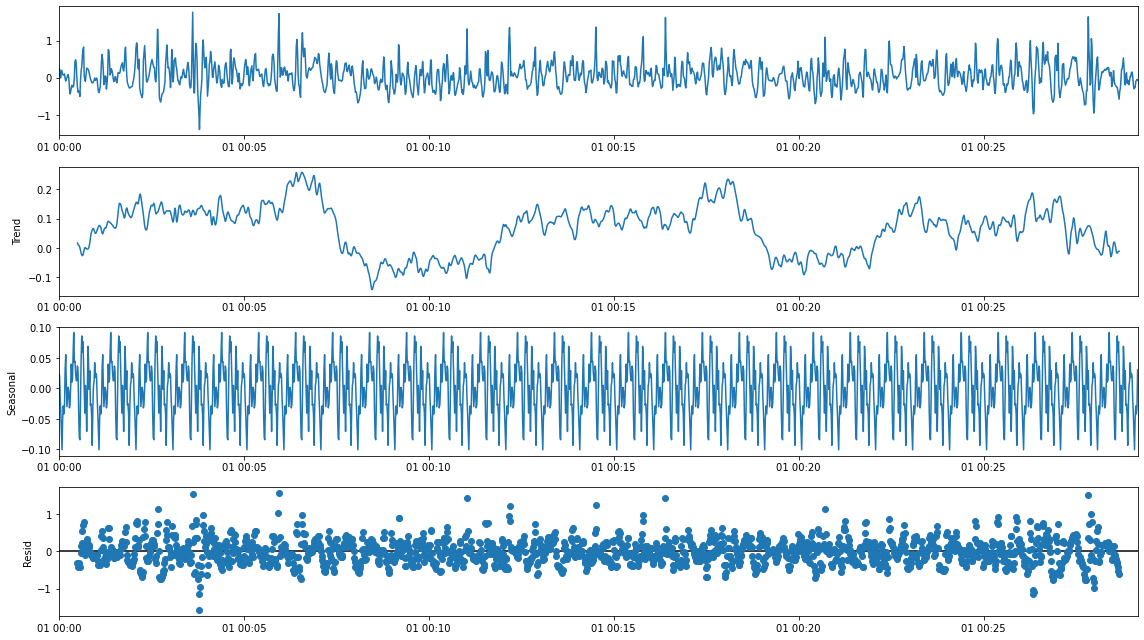

In [77]:
decomposition = sm.tsa.seasonal_decompose(df_userAcceleration_x, model='additive',period=60)
plt.rcParams["figure.figsize"] = [16,9]
fig = decomposition.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [74]:
df_rotationRate_x= pd.DataFrame(df, columns = ['rotationRate.x',])
df_rotationRate_x.head()

rotationRate.x
datetime                           
2018-01-01 00:00:00        0.316738
2018-01-01 00:00:01        0.842032
2018-01-01 00:00:02       -0.138143
2018-01-01 00:00:03       -0.025005
2018-01-01 00:00:04        0.114253

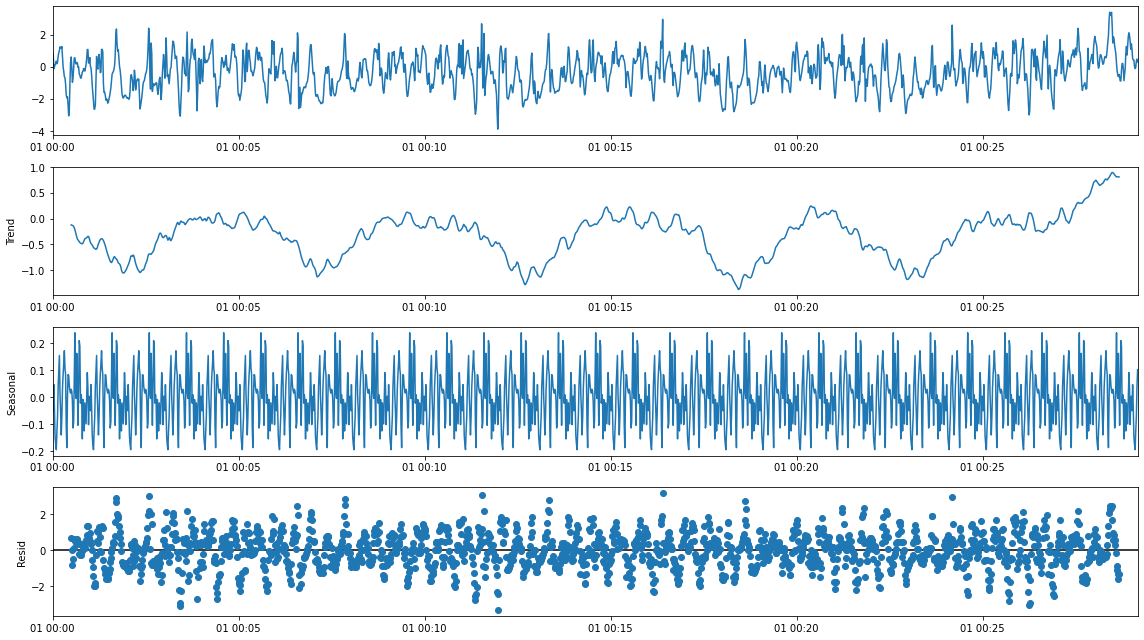

In [75]:
decomposition = sm.tsa.seasonal_decompose(df_rotationRate_x, model='additive',period=60)
plt.rcParams["figure.figsize"] = [16,9]
fig = decomposition.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

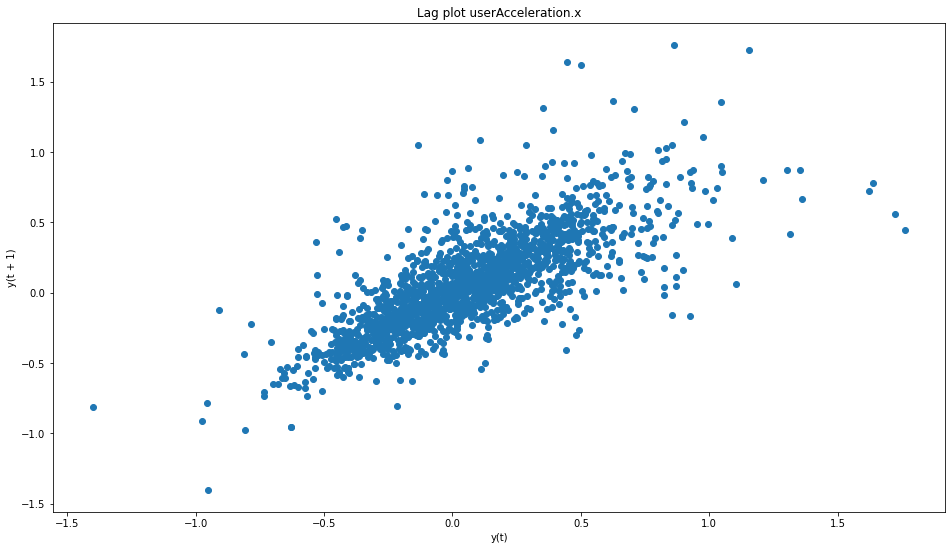

In [78]:
pd.plotting.lag_plot(df_userAcceleration_x, lag=1);
plt.title("Lag plot userAcceleration.x");
plt.show(block=True);

Create a lag plot for `rotationRate.x`

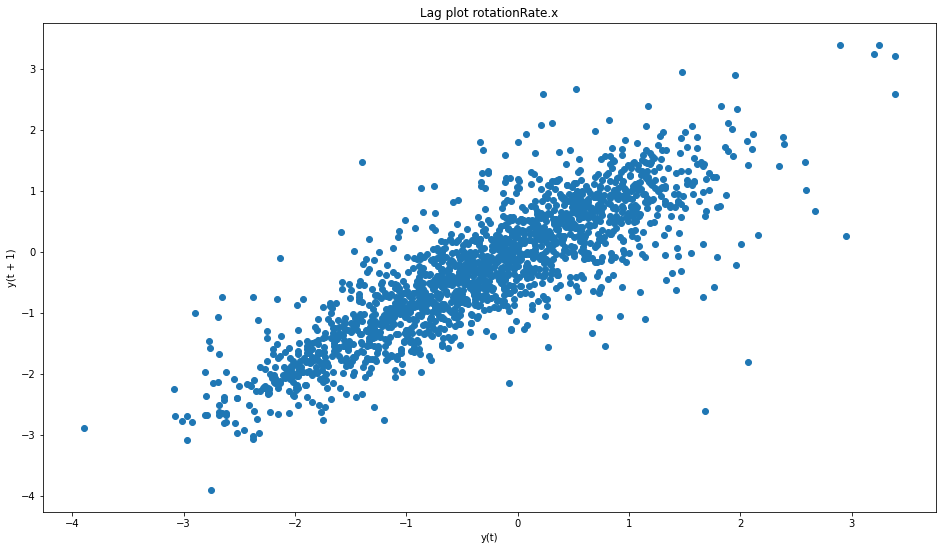

In [79]:
pd.plotting.lag_plot(df_rotationRate_x, lag=1);
plt.title("Lag plot rotationRate.x");
plt.show(block=True);

In [80]:
#si quisieramos eliminar los outliers

In [84]:
def detect_outlier(df_userAcceleration_x):
    
    threshold=3
    mean_1 = np.mean(df_userAcceleration_x)
    std_1 =np.std(df_userAcceleration_x)
    outliers=[]
    for y in df_userAcceleration_x:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [85]:
outlier_datapoints = detect_outlier(df_userAcceleration_x)
print(outlier_datapoints)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [86]:
q1, q3= np.percentile(df_userAcceleration_x,[25,75])

In [87]:
q1

-0.1732305

In [88]:
q3

0.2616235

In [89]:
iqr = q3 - q1
iqr

0.434854

In [90]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

In [91]:
lower_bound 

0.08661524999999998

In [92]:
lower_bound 

0.08661524999999998

In [93]:
#lo mismo con rotation

What are your conclusions from both visualizations?

### The example shows that the data exhibits high auto correlation behaviour as the points in the lag plot lie around the diagonal line. The model with moderate positive autocorrelation, the data contain outliers.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [94]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

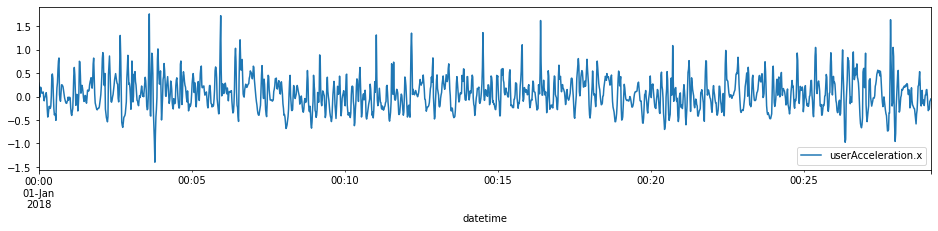

In [95]:
df_userAcceleration_x.plot(figsize=(16,3))
plt.show()

In [96]:
adf=adfuller(df_userAcceleration_x, maxlag=1)

* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

* pvaluefloat: MacKinnon”s approximate p-value based on MacKinnon (1994, 2010).

* usedlagint The number of lags used.

* nobsint The number of observations used for the ADF regression and calculation of the critical values.

* critical valuesdict 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).

* icbestfloat The maximized information criterion if autolag is not None.

In [97]:
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.571299
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


### -24.57<-2.56 Acceleration_x have stationarity

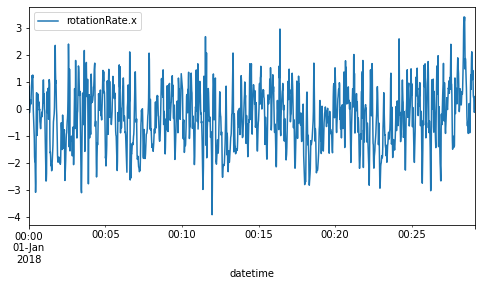

In [98]:
df_rotationRate_x.plot(figsize=(8,4))
plt.show()

In [99]:
adf_rot=adfuller(df_rotationRate_x, maxlag=1)

In [100]:
print('ADF_rot Statistic: %f' % adf[0])
print('p-value: %f' % adf_rot[1])
print('Critical Values:')
for key, value in adf_rot[4].items():
    print('\t%s: %.3f' % (key, value))

ADF_rot Statistic: -24.571299
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


What are your conclusions from this test?

* -24.57<-2.56 Acceleration_x is stationary
* -15.95 < -2.56 rotationRate_x is stationary


Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [101]:
! pip3 install pmdarima

In [102]:
#pip install pmdarima

In [103]:
from pmdarima.arima import auto_arima

In [104]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [105]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_userAcceleration_x)

(0.01, False)

In [106]:
len(df_userAcceleration_x)*0.8

1400.8000000000002

In [107]:
len(df_userAcceleration_x)*0.2

350.20000000000005

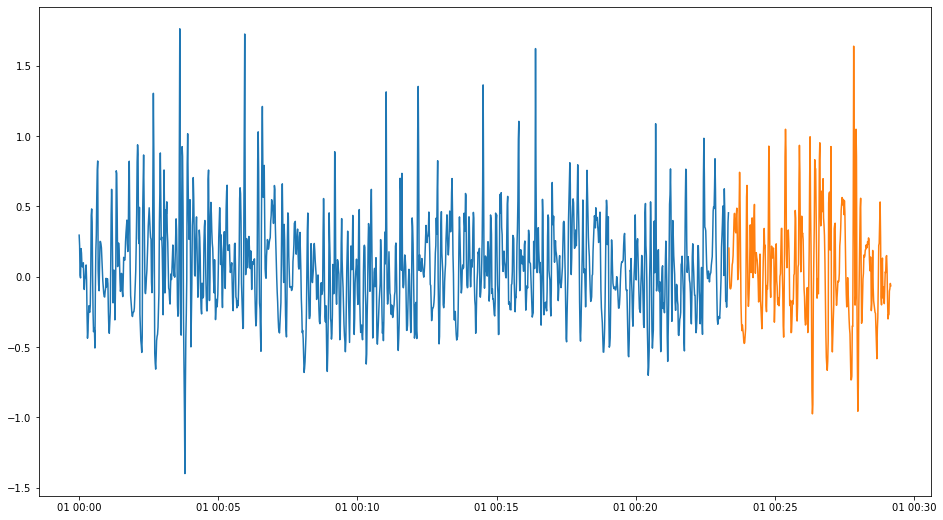

In [108]:
#Spliting the dataset into train and test
train = df_userAcceleration_x[:1401]
test = df_userAcceleration_x[-350:]

plt.plot(train)
plt.plot(test)

In [109]:
auto_arima_fit = auto_arima(df_userAcceleration_x, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=13.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1093.129, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=479.671, Time=1.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=943.876, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=290.068, Time=3.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=35.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=9.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=462.631, Time=2.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=71.461, Time=6.14 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=279.962, Time=2.12 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=38.32 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=21.61 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=38.147, Time=7.42 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=235.240, Ti

#### This will help to choose the best value of p,q and d based on the lowest AIC and BIC values

In [110]:
#p-d-q=Best model:  ARIMA(3,1,0)(2,1,0)[12] 
mod = ARIMA(df_userAcceleration_x,order=(3,0,1))
results = mod.fit()
print(results.summary())

C:\Users\pinil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\pinil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\pinil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 379.400
Date:                Fri, 23 Apr 2021   AIC                           -746.801
Time:                        17:13:02   BIC                           -713.993
Sample:                    01-01-2018   HQIC                          -734.673
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0626      0.016      3.898      0.000       0.031       0.094
ar.L1          0.9972      0.202      4.928      0.000       0.601       1.394
ar.L2         -0.3885      0.229     -1.696      0.0

* A model residuals is difference between the predicted and expected value and can be verified using the fitted model property resid().

* Residual object is of type ndarray so we will store it in a Dataframe for plotting



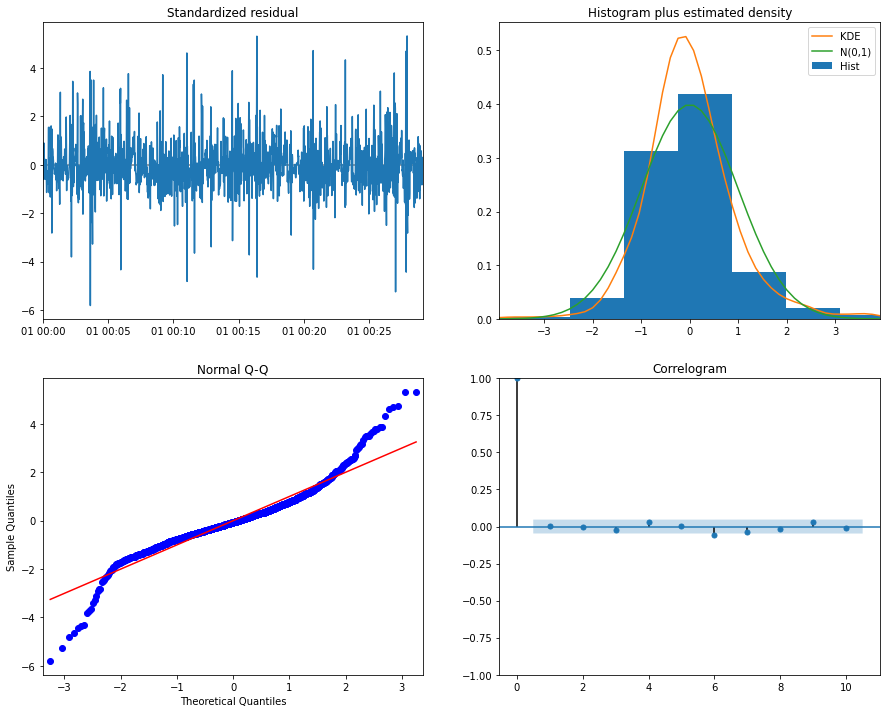

In [113]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.



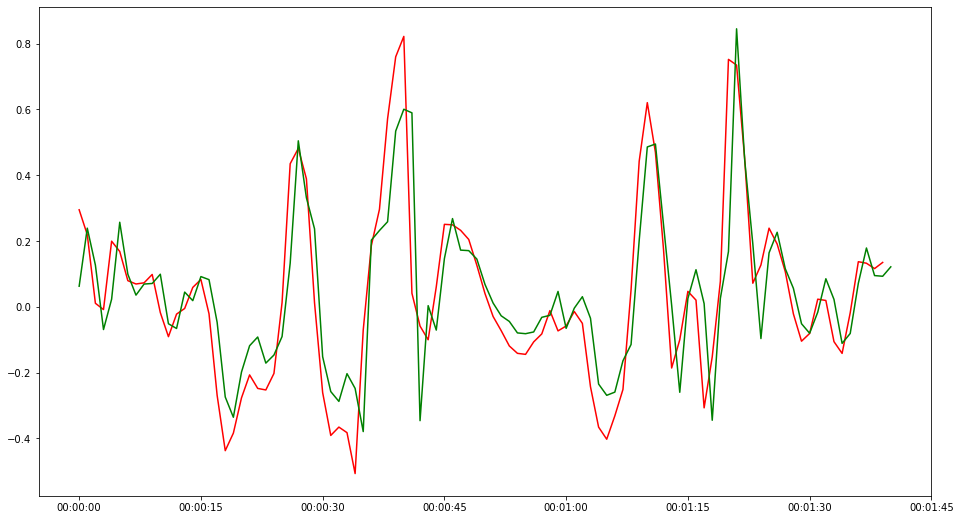

In [114]:
from math import sqrt
from sklearn.metrics import mean_squared_error
plt.plot(df_userAcceleration_x[:100],color='r')
plt.plot(results.predict(0,100),color='g')


This looks good so far but how to quantify how the score of predicted vs Expected values. For this we will calculate the Root Mean Square Error values using Scipy

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [115]:
#Root Mean Square Error
rmse =sqrt(mean_squared_error(df_userAcceleration_x, results.predict()))
print(rmse)

0.19480765343782244


* We start by comparing predicted values to real values of the time series, which will help us understand 

In [116]:
#he dynamic=False argument ensures that we produce one-step ahead forecasts,
#meaning that forecasts at each point are generated using the full history up to that point.

pred = results.get_prediction(start=pd.to_datetime('1/1/2018 00:29:10'), dynamic=False)
pred_ci = pred.conf_int()

In [117]:
df_userAcceleration_x_forecasted = pred.predicted_mean
df_userAcceleration_x_truth = df_userAcceleration_x['2018-01-01 00:00:0':]

In [118]:
# Compute the mean square error
mse = ((df_userAcceleration_x_forecasted- df_userAcceleration_x_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2018-01-01 00:29:10   NaN
userAcceleration.x    NaN
dtype: float64


The MSE of our one-step ahead forecasts yields a value of 0.01, which is very low as it is close to 0.